<a href="https://colab.research.google.com/github/AditMeh/deep-learning-from-scratch/blob/main/AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras 
import numpy as np
import tensorflow as tf

(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)


170500096/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


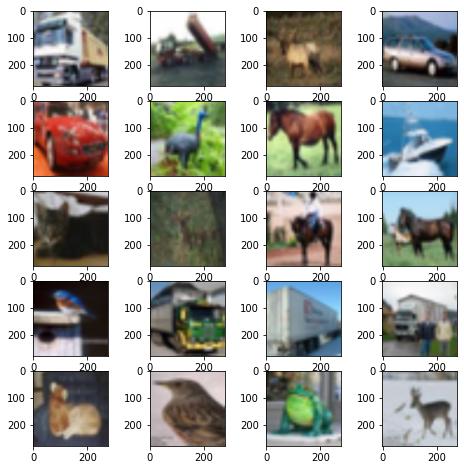

In [3]:
from skimage.transform import resize
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def data_generator():
    for i in range(len(train_images)):
        yield tf.convert_to_tensor(resize(train_images[i], (277, 277, 3))), tf.convert_to_tensor(to_categorical(train_labels[0], num_classes = 10).reshape(10,))



w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(resize(train_images[i], (277, 277, 3)))

plt.show()


In [4]:
class Alexnet(keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.conv1 = keras.layers.convolutional.Conv2D(96, 
                                                       kernel_size= (11, 11), 
                                                       strides= 4, 
                                                       activation = "relu",
                                                       data_format="channels_last",
                                                       input_shape = (277, 277, 3))
        self.conv2 = keras.layers.convolutional.Conv2D(256, 
                                                       kernel_size= (5, 5),
                                                       activation = "relu",
                                                       data_format="channels_last")
        self.conv3 = keras.layers.convolutional.Conv2D(384, 
                                                       kernel_size= (3, 3),
                                                       activation = "relu",
                                                       data_format="channels_last")        
        self.conv4 = keras.layers.convolutional.Conv2D(384, 
                                                       kernel_size= (3, 3),
                                                       activation = "relu",
                                                       data_format="channels_last")

        self.conv5 = keras.layers.convolutional.Conv2D(256, 
                                                       kernel_size= (3, 3),
                                                       activation = "relu",
                                                       data_format="channels_last")
        
        self.flatten = keras.layers.Flatten(data_format="channels_last")
        
        self.dense1 = keras.layers.Dense(4096, activation= "relu")

        self.dense2 = keras.layers.Dense(4096, activation= "relu")

        
        self.pool1 = keras.layers.pooling.MaxPooling2D(pool_size= (3,3), strides = 2,
                                                      data_format="channels_last")
        
        self.pool2 = keras.layers.pooling.MaxPooling2D(pool_size= (3,3), strides = 2,
                                                      data_format="channels_last")
        

        self.outputs = keras.layers.Dense(10, activation = "softmax")
    def call(self, inputs):
        conv1 = self.conv1(inputs)
        pool1 = self.pool1(conv1)
        conv2 = self.conv2(pool1)
        pool2 = self.pool2(conv2)
        conv3 = self.conv3(pool2)
        conv4 = self.conv4(conv3)
        conv5 = self.conv5(conv4)
        flatten_conv = self.flatten(conv5)
        ff_1 = self.dense1(flatten_conv)
        ff_2 = self.dense2(ff_1)
        return self.outputs(ff_2)
    
    def summary(self):
        x = keras.layers.Input(shape=(277, 277, 3))
        model = keras.models.Model(inputs=x, outputs=self.call(x))
        return model.summary()



In [13]:
dataset = tf.data.Dataset.from_generator( 
	lambda: data_generator(), 
    output_signature=(
         tf.TensorSpec(shape=(277, 277, 3), dtype=tf.float32),
         tf.TensorSpec(shape=(10, ), dtype=tf.int32))
    ).batch(1000)


model = Alexnet()

#model.build(input_shape= (None, 277, 277, 3))
model.summary()

model.compile(loss = ['categorical_crossentropy'], optimizer = "sgd")

history = model.fit(dataset, epochs = 10, steps_per_epoch = 10)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 277, 277, 3)]     0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 67, 67, 96)        34944     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 33, 33, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 29, 29, 256)       614656    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 384)       885120    
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 384)       1327